# 시계열 센서 데이터 예측

In [ ]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


코드셀, 또는 텍스트셀을 이용하여 이런식으로 기록 가능하다.

Shift + Enter를 통해 삽입



## Mauna Loa Weekly Atmospheric CO2 Data

https://www.statsmodels.org/devel/datasets/generated/co2.html

Citation:

Keeling, C.D. and T.P. Whorf. 2004. Atmospheric CO2 concentrations derived from flask air samples at sites in the SIO network. In Trends: A Compendium of Data on Global Change. Carbon Dioxide Information Analysis Center, Oak Ridge National Laboratory, U.S. Department of Energy, Oak Ridge, Tennessee, U.S.A.

In [ ]:
data = sm.datasets.co2.load_pandas()

data.data

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4
...,...
2001-12-01,370.3
2001-12-08,370.8
2001-12-15,371.2
2001-12-22,371.3


### 데이터프레임 인덱스 초기화

In [ ]:
df = data.data.reset_index()  # reset.index를 통해 날짜 데이터를 뽑아냈다.

df.head() # head()명령어를 통해 앞에서 5개의 데이터만 표시했다.
# df.head(8)의 명령어를 사용하면 앞에서 8개의 데이터를 표시
# df.tail(8)의 명령어를 사용하면 뒤에서 8개의 데이터를 표시

,index,co2
0,1958-03-29,316.1
1,1958-04-05,317.3
2,1958-04-12,317.6
3,1958-04-19,317.5
4,1958-04-26,316.4


### 칼럼 이름 바꾸기

In [ ]:
# columns의 이름 변경
df_prophet = df.rename(columns={
    'index': 'ds', # index(날짜) -> ds
    'co2': 'y' # co2 -> y
})

df_prophet.tail() # 뒤에서 5개 출력

,ds,y
2279,2001-12-01,370.3
2280,2001-12-08,370.8
2281,2001-12-15,371.2
2282,2001-12-22,371.3
2283,2001-12-29,371.5


### 그래프 그리기

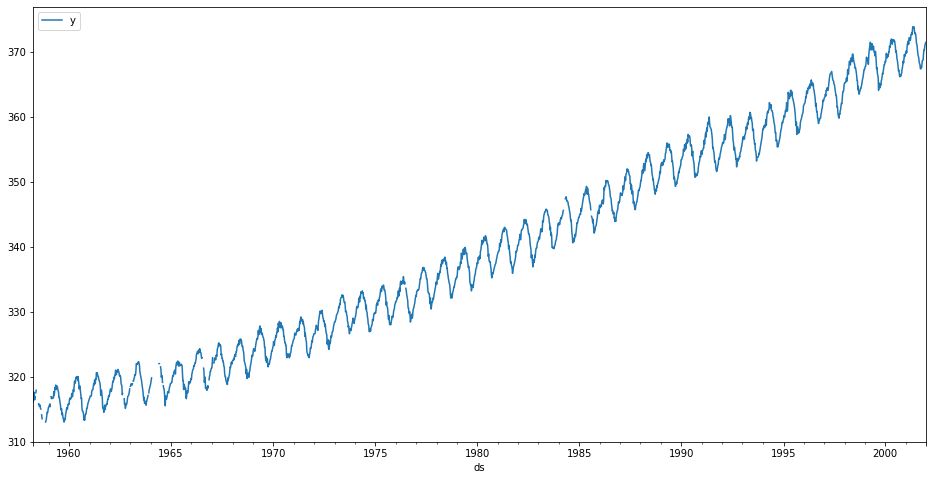

In [ ]:
df_prophet.plot(x='ds', y='y', figsize=(16, 8))

### 미래 데이터 예측하기

#### Prophet

https://facebook.github.io/prophet/docs/quick_start.html

In [ ]:
from fbprophet import Prophet

model = Prophet(
    yearly_seasonality=True, # 연간 계절성(월 단위) = True
    weekly_seasonality=True, # 주간 계절성(요일 단위) = True
    daily_seasonality=False, # 일간 계절성(시간 단위) = False
)

model.fit(df_prophet)

연간, 주간 계절성만 활성화 한 이유는 측정한 데이터에 시간 단위는 없어서 의미가 없다.

In [ ]:
future = model.make_future_dataframe(periods=365)

forecast = model.predict(future)

forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2644,2002-12-25,374.883153,373.782037,375.120713,374.731343,375.058978,-0.448478,-0.448478,-0.448478,0.164347,0.164347,0.164347,-0.612825,-0.612825,-0.612825,0.0,0.0,0.0,374.434675
2645,2002-12-26,374.887990,373.806060,375.146502,374.734542,375.065081,-0.414302,-0.414302,-0.414302,0.164347,0.164347,0.164347,-0.578649,-0.578649,-0.578649,0.0,0.0,0.0,374.473689
2646,2002-12-27,374.892828,373.866351,375.215034,374.737742,375.071185,-0.380229,-0.380229,-0.380229,0.164347,0.164347,0.164347,-0.544576,-0.544576,-0.544576,0.0,0.0,0.0,374.512599
2647,2002-12-28,374.897665,372.720773,374.061474,374.741011,375.077288,-1.496797,-1.496797,-1.496797,-0.986083,-0.986083,-0.986083,-0.510714,-0.510714,-0.510714,0.0,0.0,0.0,373.400868
2648,2002-12-29,374.902502,373.956654,375.264723,374.744472,375.083392,-0.312824,-0.312824,-0.312824,0.164347,0.164347,0.164347,-0.477171,-0.477171,-0.477171,0.0,0.0,0.0,374.589679


중요하게 봐야할것은 yhat_lower, yhat_upper, yhat 데이터이다.  
yhat_lower, yhat_upper = 오차의 범위  
yhat = 예측한 값

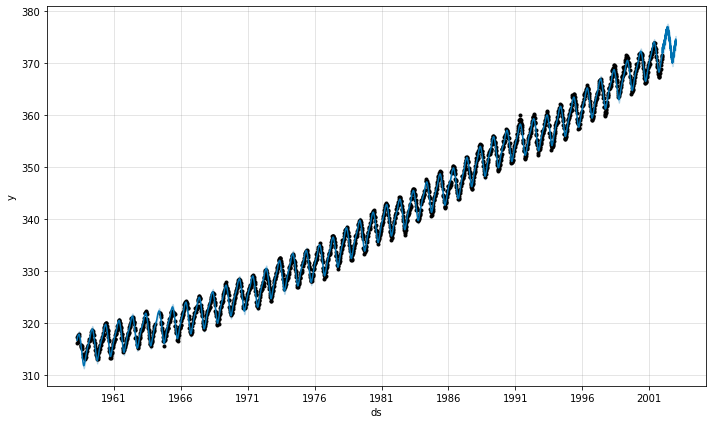

In [ ]:
fig1 = model.plot(forecast)

### 트렌드와 계절성

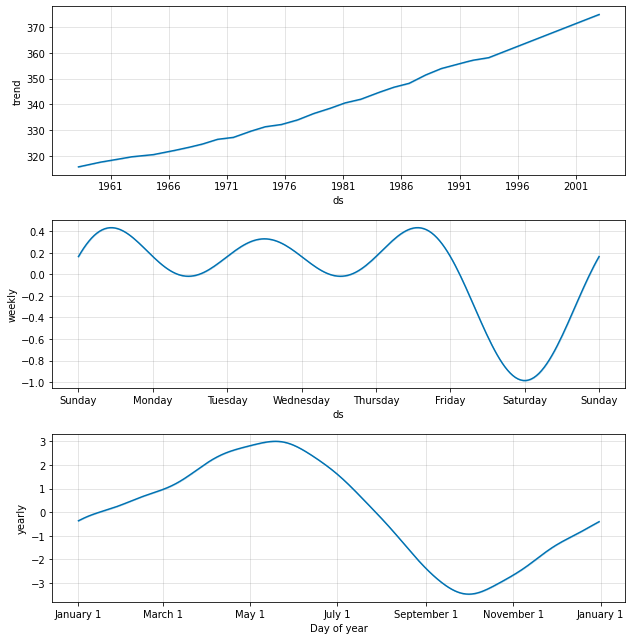

In [ ]:
fig2 = model.plot_components(forecast)  # 어떤 요소들이 미래를 예측하는데 가장 큰 영향을 미쳤는지 출력해준다.

## El Nino - Sea Surface Temperatures

https://www.statsmodels.org/devel/datasets/generated/elnino.html

In [ ]:
data = sm.datasets.elnino.load_pandas() # 엘리뇨 데이터를 판다스 형태로 로드

df = data.data

df

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1950.0,23.11,24.20,25.37,23.86,23.03,21.57,20.63,20.15,19.67,20.03,20.02,21.80
1,1951.0,24.19,25.28,25.60,25.37,24.79,24.69,23.86,22.32,21.44,21.77,22.33,22.89
2,1952.0,24.52,26.21,26.37,24.73,23.71,22.34,20.89,20.02,19.63,20.40,20.77,22.39
3,1953.0,24.15,26.34,27.36,27.03,25.47,23.49,22.20,21.45,21.25,20.95,21.60,22.44
4,1954.0,23.02,25.00,25.33,22.97,21.73,20.77,19.52,19.33,18.95,19.11,20.27,21.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2006.0,24.76,26.52,26.22,24.29,23.84,22.82,22.20,21.89,21.93,22.46,22.61,24.15
57,2007.0,25.82,26.81,26.41,24.96,23.05,21.61,21.05,19.95,19.85,19.31,19.82,21.15
58,2008.0,24.24,26.39,26.91,25.68,24.43,23.19,23.02,22.14,21.60,21.39,21.54,22.73
59,2009.0,24.39,25.53,25.48,25.84,24.95,24.09,23.09,22.03,21.48,21.64,21.99,23.21


### 1월만 뽑아보기

In [ ]:
df[['YEAR', 'JAN']]

,YEAR,JAN
0,1950.0,23.11
1,1951.0,24.19
2,1952.0,24.52
3,1953.0,24.15
4,1954.0,23.02
...,...,...
56,2006.0,24.76
57,2007.0,25.82
58,2008.0,24.24
59,2009.0,24.39


### 1월의 그래프

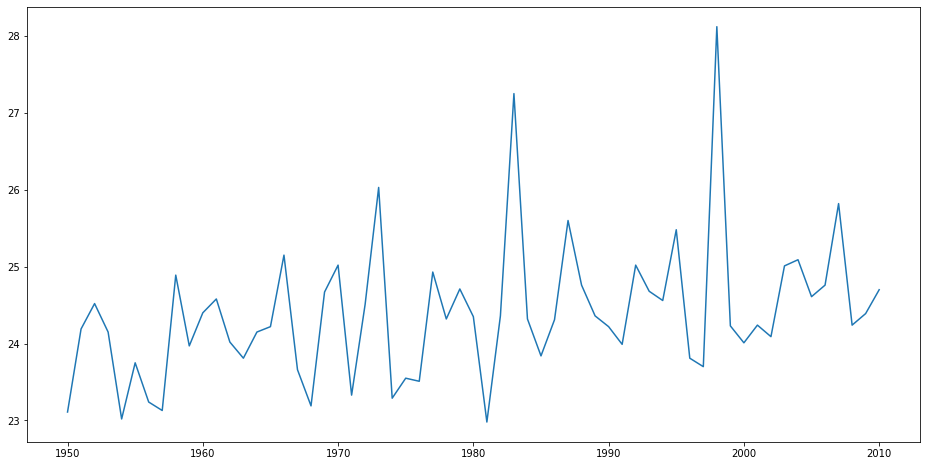

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))
plt.plot(df[['YEAR']], df[['JAN']])
plt.show()

### 월별 그래프

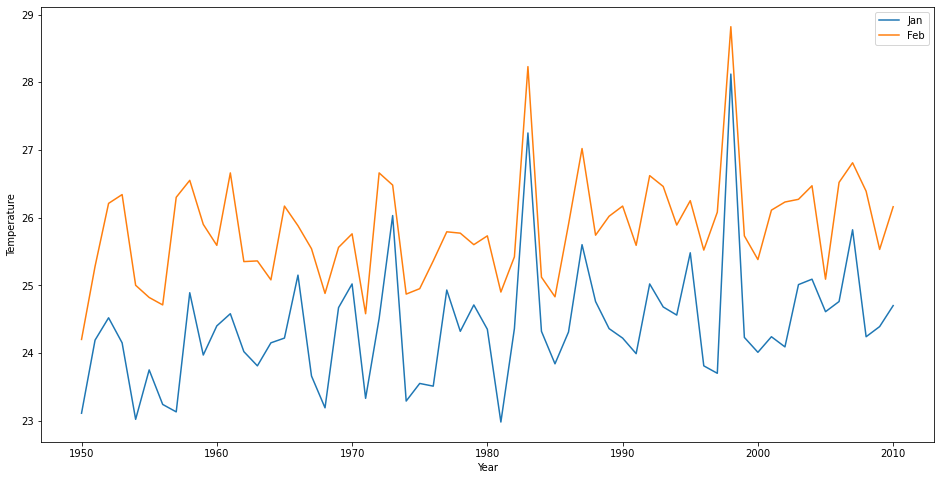

In [ ]:
plt.figure(figsize=(16, 8))

plt.plot(df[['YEAR']], df[['JAN']], label='Jan')
plt.plot(df[['YEAR']], df[['FEB']], label='Feb')

plt.xlabel('Year') # x축 제목
plt.ylabel('Temperature') # y축 제목

plt.legend() # 범례

plt.show() # 그래프 보이기

### 숙제: 모든 월별 차트 그리기

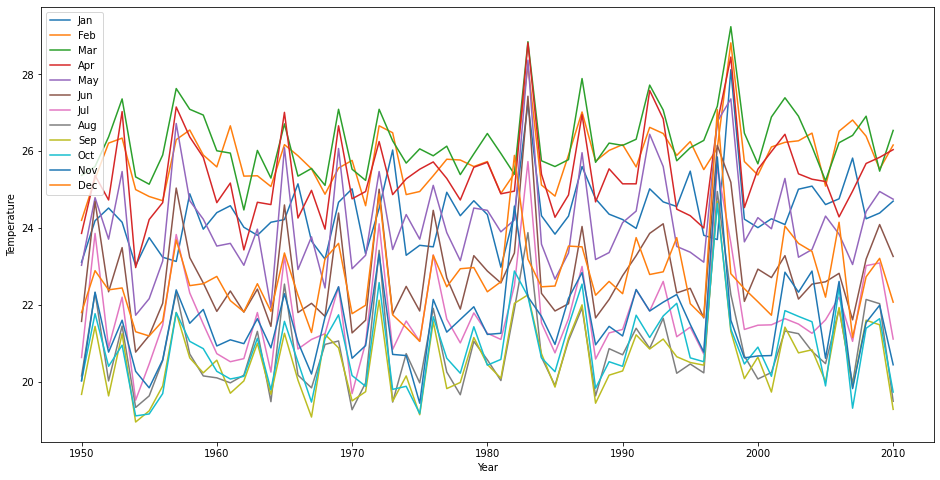

In [ ]:
plt.figure(figsize=(16, 8))

plt.plot(df[['YEAR']], df[['JAN']], label='Jan')
plt.plot(df[['YEAR']], df[['FEB']], label='Feb')
plt.plot(df[['YEAR']], df[['MAR']], label='Mar')
plt.plot(df[['YEAR']], df[['APR']], label='Apr')
plt.plot(df[['YEAR']], df[['MAY']], label='May')
plt.plot(df[['YEAR']], df[['JUN']], label='Jun')
plt.plot(df[['YEAR']], df[['JUL']], label='Jul')
plt.plot(df[['YEAR']], df[['AUG']], label='Aug')
plt.plot(df[['YEAR']], df[['SEP']], label='Sep')
plt.plot(df[['YEAR']], df[['OCT']], label='Oct')
plt.plot(df[['YEAR']], df[['NOV']], label='Nov')
plt.plot(df[['YEAR']], df[['DEC']], label='Dec')


plt.xlabel('Year') # x축 제목
plt.ylabel('Temperature') # y축 제목

plt.legend() # 범례

plt.show() # 그래프 보이기

### 전처리 - 월별 데이터를 예쁘게 만들기

In [ ]:
import pandas as pd

for i, row in df.iterrows():
  print(row)
  break # 다 출력하기에는 너무 길어서 반복문을 한번만 돌게하려고 넣어둔것, 실사용에는 제거

YEAR    1950.00
JAN       23.11
FEB       24.20
MAR       25.37
APR       23.86
MAY       23.03
JUN       21.57
JUL       20.63
AUG       20.15
SEP       19.67
OCT       20.03
NOV       20.02
DEC       21.80
Name: 0, dtype: float64


In [ ]:
for i, row in df.iterrows(): # 연별로 row(열)을 쪼개기위해서 for문 사용
  for month, temp in row.iteritems(): # 월별로 row(열)을 쪼개기위해서 for문 사용
    print(month, temp) # 월, 온도 출력
  break # 다 출력하기에는 너무 길어서 반복문을 한번만 돌게하려고 넣어둔것, 실사용에는 제거

YEAR 1950.0
JAN 23.11
FEB 24.2
MAR 25.37
APR 23.86
MAY 23.03
JUN 21.57
JUL 20.63
AUG 20.15
SEP 19.67
OCT 20.03
NOV 20.02
DEC 21.8


In [ ]:
months = [None, 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']

for i, row in df.iterrows(): # 연도 단위
  year = row['YEAR']

  for month, temp in row.iteritems(): # 월 단위
    if month == 'YEAR':
      continue  # 월이 아닌 연도가 나오면 pass한다

    date = '%d-%02d-01' % (year, months.index(month)) # 날짜 형식 설정

    print(date, temp)
  break

1950-01-01 23.11
1950-02-01 24.2
1950-03-01 25.37
1950-04-01 23.86
1950-05-01 23.03
1950-06-01 21.57
1950-07-01 20.63
1950-08-01 20.15
1950-09-01 19.67
1950-10-01 20.03
1950-11-01 20.02
1950-12-01 21.8


In [ ]:
df2 = pd.DataFrame([], columns=['ds', 'y']) # column의 이름 설정

months = [None, 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']

for i, row in df.iterrows():
  year = row['YEAR']

  for month, temp in row.iteritems():
    if month == 'YEAR':
      continue

    date = '%d-%02d-01' % (year, months.index(month))

    df2 = df2.append({ # 데이터를 추가
        'ds': date, # ds : 날짜
        'y': temp # y : 온도
    }, ignore_index=True) # append 시 중요

df2 # 출력

,ds,y
0,1950-01-01,23.11
1,1950-02-01,24.20
2,1950-03-01,25.37
3,1950-04-01,23.86
4,1950-05-01,23.03
...,...,...
727,2010-08-01,19.49
728,2010-09-01,19.28
729,2010-10-01,19.73
730,2010-11-01,20.44


### 그래프 그리기

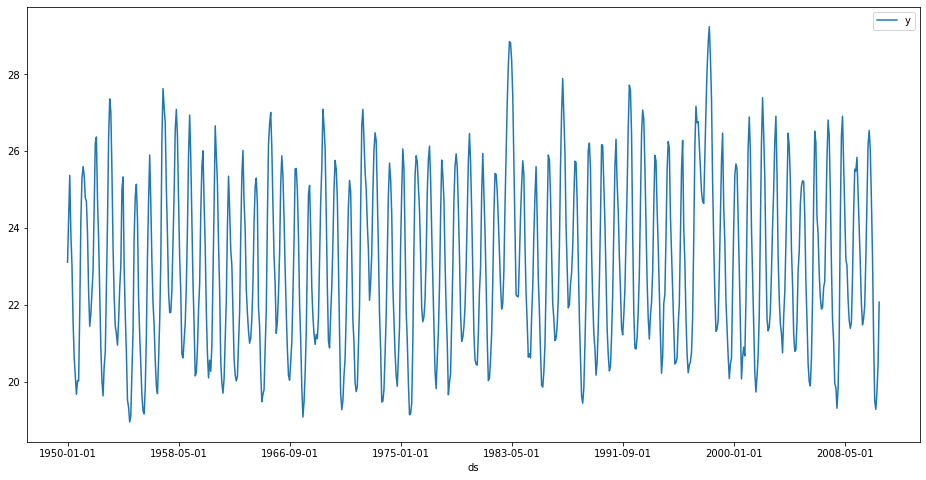

In [ ]:
df2.plot(x='ds', y='y', figsize=(16, 8))

### 미래 데이터 예측하기

In [ ]:
from fbprophet import Prophet

model = Prophet(
    yearly_seasonality=True # 연간 계절성
)

model.fit(df2) # 가공한 데이터 입력

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = model.make_future_dataframe(periods=12, freq='M') # freq='M' 월별로 예측

forecast = model.predict(future)

forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
739,2011-07-31,23.066372,19.560155,22.225386,23.066277,23.066438,-2.120982,-2.120982,-2.120982,-2.120982,-2.120982,-2.120982,0.0,0.0,0.0,20.945390
740,2011-08-31,23.063927,19.117573,21.826377,23.063705,23.064076,-2.628431,-2.628431,-2.628431,-2.628431,-2.628431,-2.628431,0.0,0.0,0.0,20.435496
741,2011-09-30,23.061561,19.609958,22.292309,23.061176,23.061863,-2.098442,-2.098442,-2.098442,-2.098442,-2.098442,-2.098442,0.0,0.0,0.0,20.963118
742,2011-10-31,23.059115,20.165512,22.792382,23.058540,23.059538,-1.599504,-1.599504,-1.599504,-1.599504,-1.599504,-1.599504,0.0,0.0,0.0,21.459612
743,2011-11-30,23.056749,21.126546,23.731644,23.056015,23.057319,-0.563463,-0.563463,-0.563463,-0.563463,-0.563463,-0.563463,0.0,0.0,0.0,22.493286


### 트렌드와 계절성

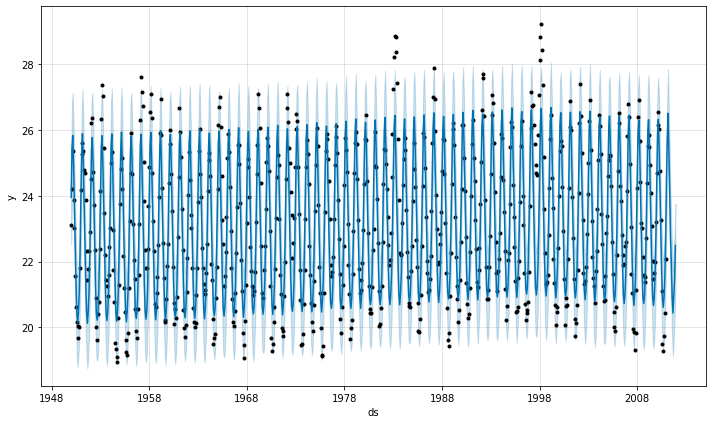

In [ ]:
fig1 = model.plot(forecast)

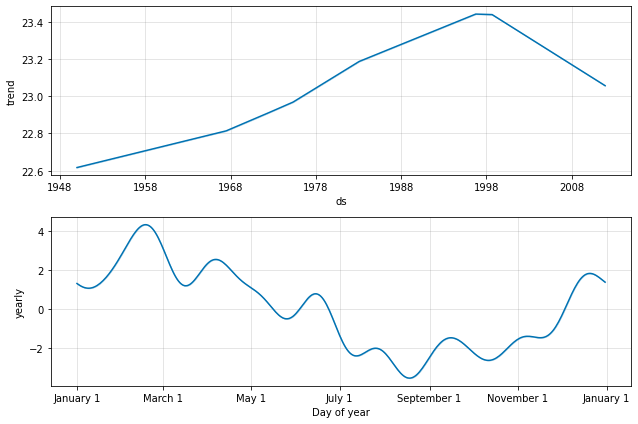

In [ ]:
fig2 = model.plot_components(forecast)

# 센서 데이터를 활용한 대기 오염 예측

## Tabular Playground Series - Jul 2021

https://www.kaggle.com/c/tabular-playground-series-jul-2021/

In this competition you are predicting the values of air pollution measurements over time, based on basic weather information (temperature and humidity) and the input values of 5 sensors.

In [ ]:
import pandas as pd

df = pd.read_csv('https://github.com/kairess/toy-datasets/raw/master/Tabular%20Playground%20Series%20-%20Jul%202021.csv') # csv를 읽어서 df에 저장

df.head() # df 출력

,date_time,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
0,2010-03-10 18:00:00,13.1,46.0,0.7578,1387.2,1087.8,1056.0,1742.8,1293.4,2.5,12.0,167.7
1,2010-03-10 19:00:00,13.2,45.3,0.7255,1279.1,888.2,1197.5,1449.9,1010.9,2.1,9.9,98.9
2,2010-03-10 20:00:00,12.6,56.2,0.7502,1331.9,929.6,1060.2,1586.1,1117.0,2.2,9.2,127.1
3,2010-03-10 21:00:00,11.0,62.4,0.7867,1321.0,929.0,1102.9,1536.5,1263.2,2.2,9.7,177.2
4,2010-03-10 22:00:00,11.9,59.0,0.7888,1272.0,852.7,1180.9,1415.5,1132.2,1.5,6.4,121.8


csv파일을 깃허브에 올려서 링크로 사용할 수 도 있고
코랩에 직접 업로드하여 사용할 수도 있다.

### 데이터 미리보기

In [ ]:
df.describe()

,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
count,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000,7111.000000
mean,20.878034,47.561004,1.110309,1091.572100,938.064970,883.903305,1513.238349,998.335565,2.086219,10.237083,204.066784
std,7.937917,17.398731,0.398950,218.537554,281.978988,310.456355,350.180310,381.537695,1.447109,7.694426,193.927723
min,1.300000,8.900000,0.198800,620.300000,364.000000,310.600000,552.900000,242.700000,0.100000,0.100000,1.900000
25%,14.900000,33.700000,0.855900,930.250000,734.900000,681.050000,1320.350000,722.850000,1.000000,4.500000,76.450000
50%,20.700000,47.300000,1.083500,1060.500000,914.200000,827.800000,1513.100000,928.700000,1.700000,8.500000,141.000000
75%,25.800000,60.800000,1.404150,1215.800000,1124.100000,1008.850000,1720.400000,1224.700000,2.800000,14.200000,260.000000
max,46.100000,90.800000,2.231000,2088.300000,2302.600000,2567.400000,2913.800000,2594.600000,12.500000,63.700000,1472.300000


### 데이터 분할하기

In [ ]:
x_data = df.drop(columns=['date_time', 'target_carbon_monoxide', 'target_benzene', 'target_nitrogen_oxides'])
y_data = df[['target_carbon_monoxide']]

print(x_data.shape, y_data.shape)

(7111, 8) (7111, 1)


x는 8개의 센서를 사용해서 8  
y는 1개의 값을 예측할것이므로 1

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=2021)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5688, 8) (5688, 1)
(1423, 8) (1423, 1)


5688개의 데이터로 예측  
1423개의 데이터로 테스트

### 예측 모델 생성하기

In [ ]:
from sklearn.linear_model import LinearRegression # 머신러닝에서 가장 기초가 되는 알고리즘

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

### 테스트 데이터로 예측하기

In [ ]:
y_pred = model.predict(x_test) # 데이터를 보고 예측한 일산화탄소의 양, 1열은 1열의 데이터를 보고, 2열은 2열의 데이터를 보고 

y_pred

array([[1.86556318],
       [1.69632987],
       [1.08249819],
       ...,
       [1.3074212 ],
       [0.27769392],
       [2.56022789]])

### 정확도 계산

Mean absolute error

In [ ]:
abs(y_test - y_pred).mean()

target_carbon_monoxide    0.401555
dtype: float64

In [ ]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)

0.40155510401870925

### 생각해보기: 계절과 시간을 고려하면 더 정확도가 높을까?

### 생각해보기: 다른 모델 사용하기 (Regression)

